Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 04: Segmentation and Color

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, December 2, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (the exponential function) [2 Bonus Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an *exponential function*? How can it be characterized? What is special about $e^x$?

YOUR ANSWER HERE

**b)** How is the exponential function defined for complex arguments? In what way(s) does this generalize the real case?

YOUR ANSWER HERE

**c)** The complex exponential function allows to define a mapping $\mathbb{R}\to\mathbb{C}$ by $x\mapsto e^{ix}$? How does the graph of this mapping look like? Where are the points $e^{2\pi i\frac mn}$ for $m=0,...,n\in\mathbb{N}$ located on this graph?

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE

## Assignment 1: Painting with a webcam using color detection [2 points]


### Introducing cvloop

From now on we will try to make the exercises a bit more interactive and enable you to see the algorithms in live action. For that purpose we use the package `cvloop`. To install it first source your cv environment and then run the follwing cell

In [ ]:
!pip install cvloop

Check that it works by executing the cell below:

<IPython.core.display.Javascript object>


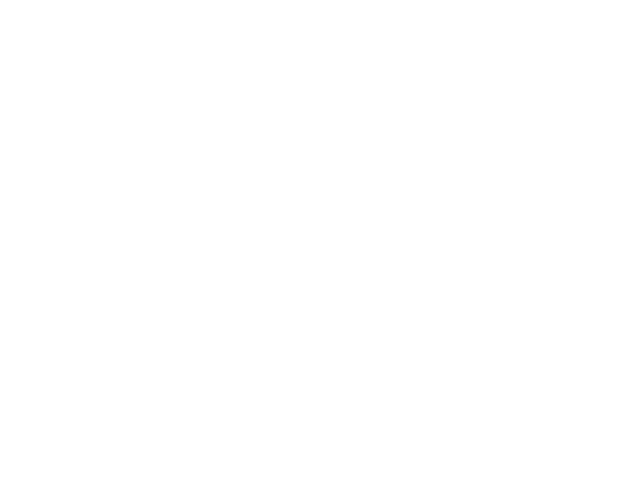

C:\Users\Emanuel\Miniconda3\envs\cv\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))
C:\Users\Emanuel\Miniconda3\envs\cv\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  'bottom=%s, top=%s') % (bottom, top))


ValueError: zero-size array to reduction operation minimum which has no identity

In [1]:
from cvloop import cvloop
cvl = cvloop(function=lambda frame: 255 - frame, side_by_side=True)

### a)
In this task we will track a small colored object (like the cap of a pen) in front of a neutral background of a different color. We will use the location of the object to paint on a virtual canvas. For that you have to implement the following tasks in the `draw_func` function:

* Convert the image `img` given to the `draw_func` into HSV color space. You may use the OpenCV function `cvtColor`. Note: In OpenCV BGR and not RGB is the standard color space.
* Measure the color of your object. You may return the converted image and interactively measure the color with your mouse. Define your measured hue value in a constant
* Discard all channel except the hue channel. 
* Find the location with the most similar hue to the measured hue of your object. You may cast your `uint8` image to `int16`
to allow negative values
* Paint for example a circle at this position in `img_draw`.

Use OpenCV functions to find minima, draw circles, etc.

In [2]:
%matplotlib inline
from cvloop import cvloop
import cv2
import numpy as np

radius = 5
color = (255,255,255)
# Adapt this hue value to the hue of your object
h = 122
img_draw = np.zeros((480,640,3), np.uint8) 

def draw_func(img):
    
    """
    Draw circle on img_draw at detected object location
    
    Args:
        img          the BGR input image (uint8)

    Returns:
        img_draw     img with circle drawn at postion of object
    """
    
    # YOUR CODE HERE
    hsv_img  = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    diff_img = cv2.medianBlur(hsv_img[:,:,0] - h,5)
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hue_img)
    
    cv2.circle(diff_img, minLoc, 80, (255,0,0),20)
    return diff_img

In [3]:
# Test with single image and without cvloop. (cvloop supresses errors in the called function)
%matplotlib inline
import imageio
import matplotlib.pyplot as plt

reader = imageio.get_reader('<video0>')
img = reader.get_next_data()

plt.imshow(draw_func(img))

reader.close()



IndexError: No ffdshow camera at index 0.

<IPython.core.display.Javascript object>


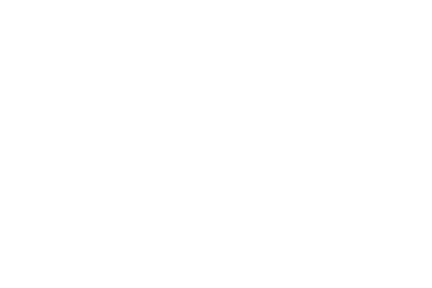

C:\Users\Emanuel\Miniconda3\envs\cv\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))
C:\Users\Emanuel\Miniconda3\envs\cv\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  'bottom=%s, top=%s') % (bottom, top))


ValueError: zero-size array to reduction operation minimum which has no identity

In [4]:
# Now use cvloop to run the algorithm live on webcam data     
cvl = cvloop(function=draw_func, side_by_side=True)

## Assignment 2: Histogram-based segmentation [5 Points]

### a) Histogram-based segmentation

What is histogram-based segmentation? What are it's goals, benefits, and problems?

Histogram-based segmentation binarizes an image based on a threshold which is chosen by looking at the histogram such that background and foreground are separated. It doesn't work well for images with different brightness in different parts of the image.

### b) Threshold computation

There exist different methods to automatically determine a threshold for an image. Find at least two that are provided by scikit-image and describe them in more detail. Then apply them to the images `schrift.png` and `pebbles.jpg`.

Minimum threshold: The histogram is smoothed until there are only two maxima and then the minimum value in between is taken as threshold.  
Mean threshold: The mean value of all values is taken as threshold.

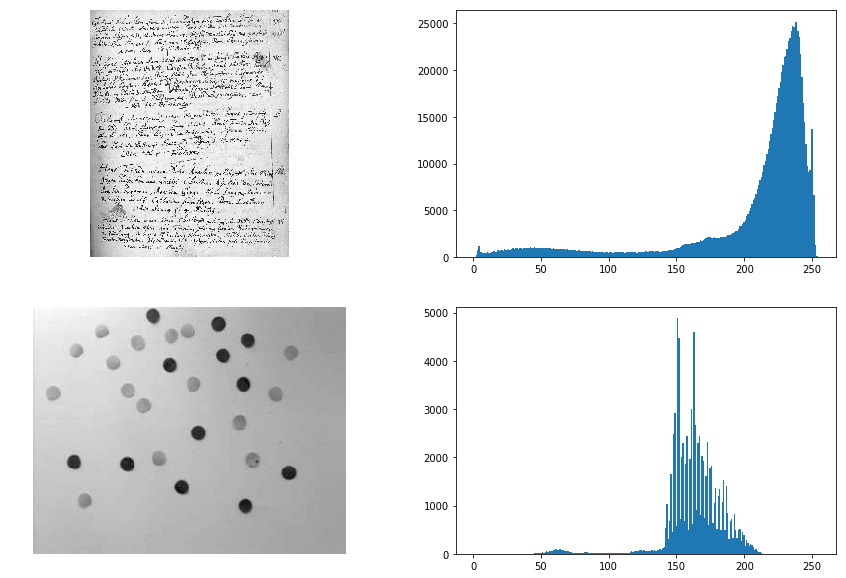

In [5]:
# Run this cell to get an impression of how the histograms look

%matplotlib inline
import matplotlib.pyplot as plt

# plt.imread reads pngs as float and jpg as uint8
img1 = plt.imread('images/schrift.png')*255
img2 = plt.imread('images/pebbles.jpg') 

plt.figure(figsize=(15, 10)) 
plt.gray()
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img1)
plt.subplot(2,2,2)
plt.hist(img1.flatten(), 256, (0, 255))
plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2)
plt.subplot(2,2,4)
plt.hist(img2.flatten(), 256, (0, 255))
plt.show()

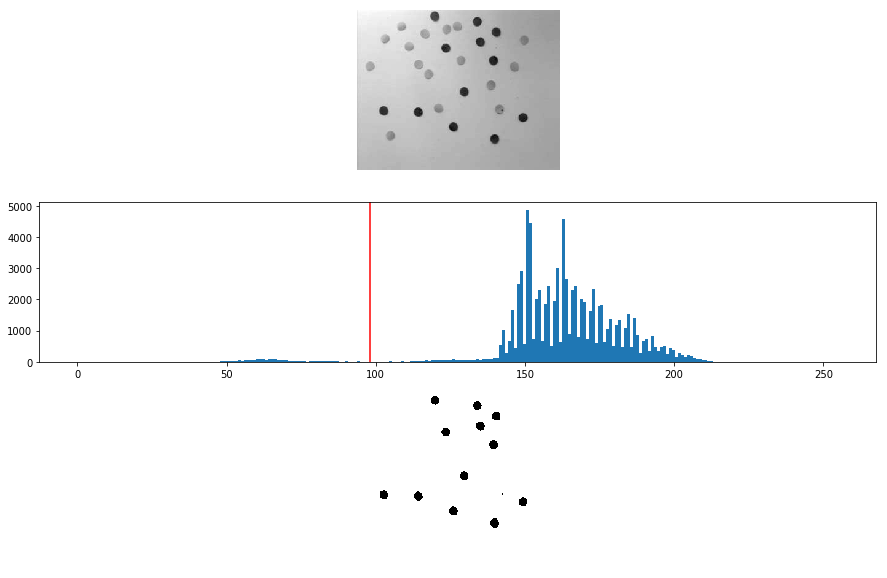

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.filters as skif

img = plt.imread('images/pebbles.jpg') # 'schrift.png' or 'pebbles.jpg'

# YOUR CODE HERE
thresh = skif.threshold_minimum(img)
# thresh = skif.threshold_mean(img)
segments = thresh < img

plt.figure(figsize=(15, 10))
plt.gray()
plt.subplot(3,1,1); plt.axis('off'); plt.imshow(img)
plt.subplot(3,1,2); plt.hist(img.flatten(), 256, (0,255))
plt.axvline(thresh, color='r')
plt.subplot(3,1,3); plt.axis('off'); plt.imshow(segments)
plt.show()

### c) Shading

Shading may cause a problem to histogram based segmentation. In the lecture (CV-07 slide 13), it was proposed to compute a shading image to deal with that problem. Apply this approach to the images `schrift.png` and `pebbles.jpg`. You may use filter functions from scikit-image for this exercise.

C:\Users\Emanuel\Miniconda3\envs\cv\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


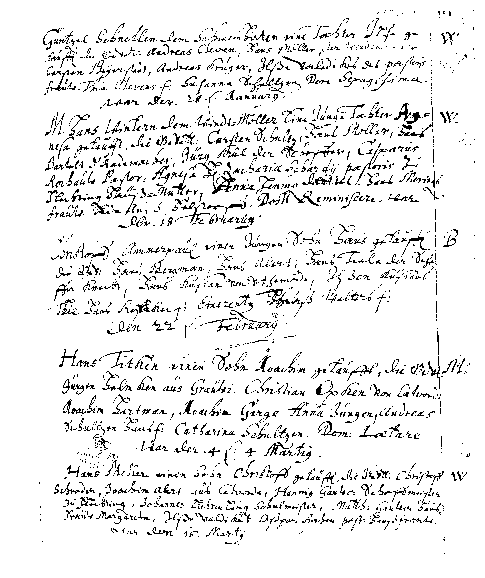

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski

img = plt.imread('images/schrift.png')
#img = plt.imread('images/pebbles.png')

# YOUR CODE HERE
background = ski.filters.rank.maximum(img, np.ones((13, 13)))
shading = 1 / background
img_cor = img * shading
img_cor = ski.exposure.rescale_intensity(img_cor)
img_seg = skif.threshold_minimum(img_cor) < img_cor

plt.figure(figsize=(15, 10))
plt.axis("off")
plt.imshow(img_seg)
plt.show()

## Assignment 3: Pyramid representation [3 Points]

**a)** What is the *Gaussian pyramid*? How does the **reduce** operation work? Explain in your own words what low pass filtering is and why it should be used when building the pyramid? Implement the **reduce** operation and generate a figure similar to the one on (CV-07 slide 32).

A Gaussian pyramid is a multiscale representation of an image. On each level a low-pass filter is applied to the image and then the image is reduced by combining four pixels to one. A low-pass filter removes high frequency information which would cause artifacts after down-sampling. In an image it essentially distributes very fine detail onto neighbouring pixels.

C:\Users\Emanuel\Miniconda3\envs\cv\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


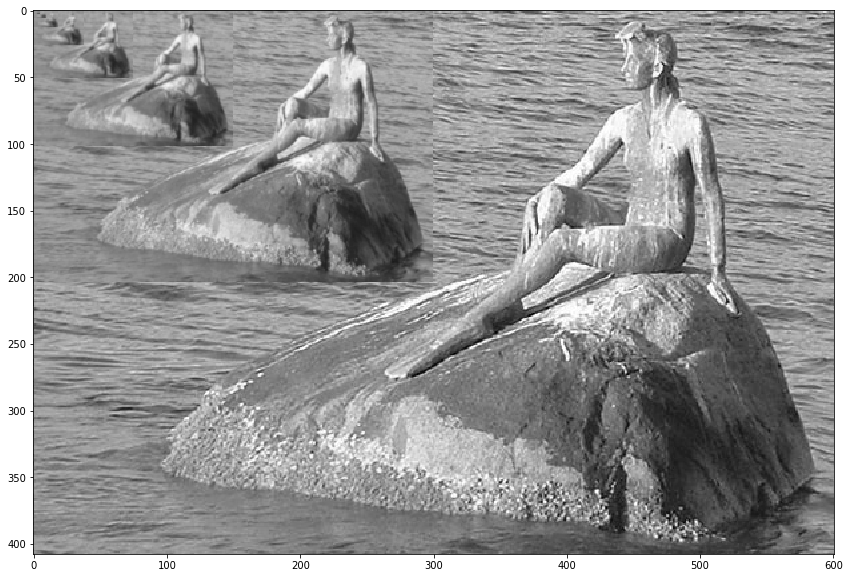

In [8]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

img = plt.imread('images/mermaid.png')

pyramid_image = img.copy()

gaus1d = 2**-4 * np.array([1, 4, 6, 4, 1])
gaus2d = gaus1d.reshape(-1, 1) * gaus1d

# YOUR CODE HERE
while min(img.shape) >= 4:
    img_lp = ndimage.convolve(img, weights=gaus2d)
    img = ndimage.zoom(img_lp, 1/2, prefilter=False)
    pyramid_image[:img.shape[0], :img.shape[1]] = img

plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()

**b)** What is the **expand** operation? Why can the **reduce** operation not be inverted? Implement the **expand** operation and generate an image similar to the one on (CV-07 slide 34).

Expand reproduces a higher level of the Gaussian pyramid from a lower. Since information is lost by reducing, expand is not an actual inversion of reduce.

(102, 151)


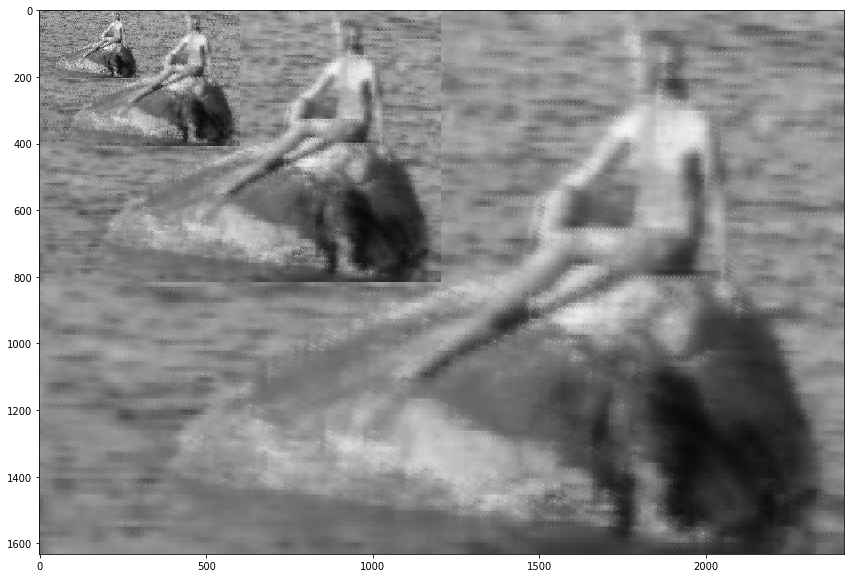

In [9]:
%matplotlib inline
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt


def representation(Pyramid):
    MainImage = Pyramid[0].copy()
    for simg in Pyramid[1:]:
        MainImage[:simg.shape[0],:simg.shape[1]] = simg
    return MainImage

kernel_even = np.array([[1,0,6,0,1]])/8
kernel_odd  = np.array([[4,0,4]])/8


img = plt.imread('images/mermaid.png')
steps = 4
img = img[::steps,::steps]
print(img.shape)

Pyramid = []
for i in range(steps):
    #upsampling
    nimg = np.zeros((img.shape[0]*2,img.shape[1]*2))
    
    nimg[::2,1::2]  = ndimage.filters.convolve(img,kernel_even)
    nimg[1::2,1::2] = ndimage.filters.convolve(img,kernel_odd)
    
    nimg[::2,::2]  = ndimage.filters.convolve(nimg[::2,1::2].T,kernel_even).T
    nimg[1::2,::2]  = ndimage.filters.convolve(nimg[::2,1::2].T,kernel_odd).T
       
    img = nimg.copy()
    Pyramid.append(img.copy())


pyramid_image = representation(Pyramid[::-1])
plt.figure(figsize=(15,10))
plt.gray()
plt.imshow(pyramid_image)
plt.show()


## Assignment 4: Texture Segmentation [5 Points]

**a)** What is texture? Try to define it in your own words. Can there be a standard definition? What problems do you expect for texture based segmentation? 

A structure in an image, usually somewhat periodic. As the definition is fluid, segmenting based on it is fluid too...

**b)** What is a co-occurence matrix? How can it be used to characterize texture?

Two dimensional histrogram showing for all pairs of pixels in an area how often which combination of values occurs. By calculation homogeneity different textures can be found.


**c)** Implement a function to compute the co-occurence matrix of an image (patch). Apply it and compare your results to (CV-07 slide 54).

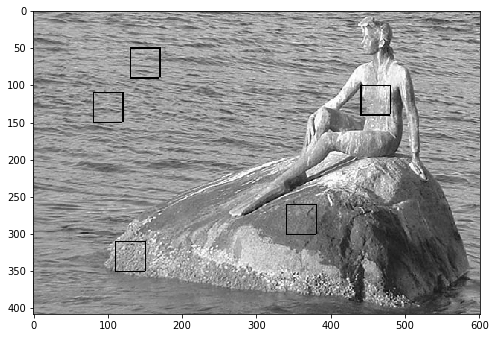

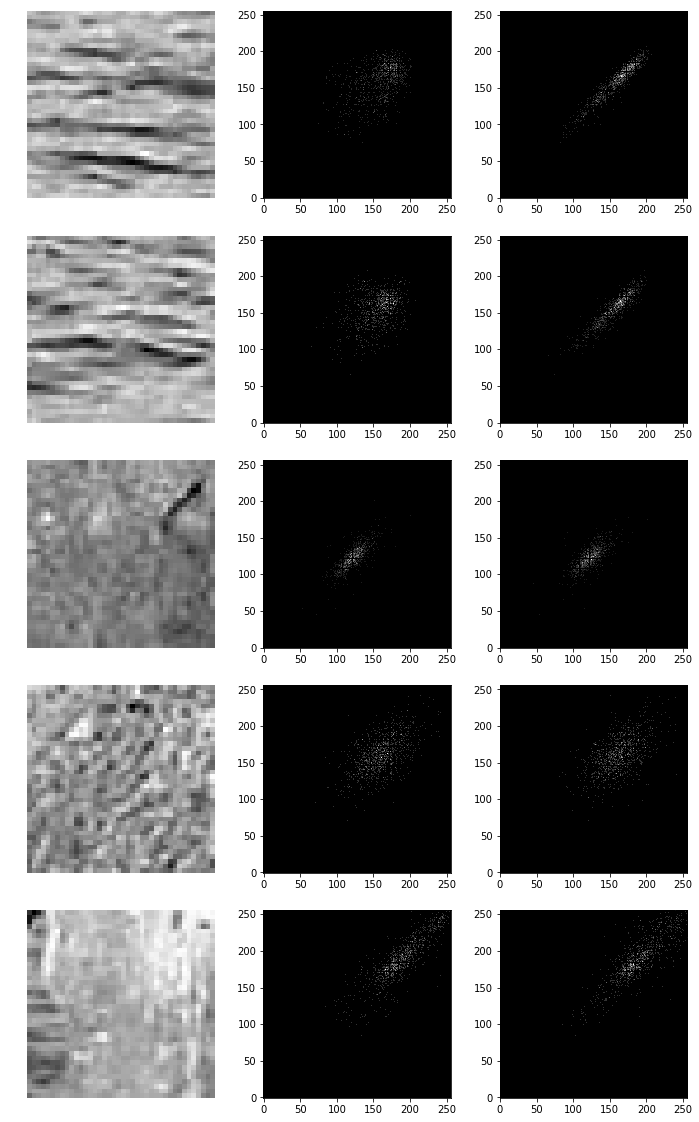

In [10]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import imageio 

img = imageio.imread('images/mermaid.png')#, mode='L')

def get_patch(img, x, y, size=40):
    """
    Extract a rectangular patch from an image and mark it in the original image.
    """
    result = img[x:x+size,y:y+size].copy()
    img[x:x+size, [y,y+1,y+size,y+size+1]] = 0
    img[[x,x+1,x+size,x+size+1], y:y+size] = 0
    return result

patches = []
patches.append(get_patch(img, 50,130))
patches.append(get_patch(img, 110,80))
patches.append(get_patch(img, 260,340))
patches.append(get_patch(img, 310,110))
patches.append(get_patch(img, 100,440))


def cooccurrence2(img, dx=1, dy=1):
    """
    Compute a co-occurence matrix for the given image.
    
    Args:
        img          the grayscale image (uint8)
        dx,dy        the offset between the two reference points

    Returns:
        matrix       the co-occurence matrix
    """
    matrix = np.zeros((256, 256))
    n = img.shape[0]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i + dy < n and j + dx < n:
                matrix[img[i, j], img[i + dy, j + dx]] += 1
    
    return matrix


plt.figure(figsize=(8, 8))
plt.gray()
plt.imshow(img)
plt.show()


plt.figure(figsize=(12, 20))
i = 0
for p in patches:
    plt.subplot(len(patches),3,i+1); plt.axis('off'); plt.imshow(p)
    # For visualization one may apply some extra me, e.g., logarithmization or binarization
    plt.subplot(len(patches),3,i+2); plt.imshow(cooccurrence2(p, 0, 1), interpolation='none', origin="lower")
    plt.subplot(len(patches),3,i+3); plt.imshow(cooccurrence2(p, 1 ,0), interpolation='none', origin="lower")
    i += 3
plt.show()

## Assignment 5: Region merging [5 Points]

Implement the *region merging* algorithm (CV-07 slide 39) and apply it to the image `segments.png` (or some part of it). Use a simple *homogeneity condition*, e.g. that the maximal difference between gray values in a segment is not larger than a given threshold.

Merging: 4, 5, true b: 5, 0
Merging: 6, 7, true b: 7, 0
Merging: 9, 34, true b: 34, 0
Merging: 19, 20, true b: 20, 0
Merging: 21, 22, true b: 22, 0
Merging: 25, 50, true b: 50, 0
Merging: 26, 27, true b: 27, 0
Merging: 29, 30, true b: 30, 0
Merging: 29, 54, true b: 54, 0
Merging: 42, 43, true b: 43, 0
Merging: 73, 98, true b: 98, 0
Merging: 76, 77, true b: 77, 0
Merging: 126, 127, true b: 127, 0
Merging: 150, 151, true b: 151, 0
Merging: 163, 164, true b: 164, 0
Merging: 179, 204, true b: 204, 0
Merging: 207, 208, true b: 208, 0
Merging: 223, 248, true b: 248, 0
Merging: 231, 256, true b: 256, 0
Merging: 258, 259, true b: 259, 0
Merging: 260, 285, true b: 285, 0
Merging: 263, 264, true b: 264, 0
Merging: 272, 297, true b: 297, 0
Merging: 293, 294, true b: 294, 0
Merging: 313, 314, true b: 314, 0
Merging: 381, 406, true b: 406, 0
Merging: 455, 456, true b: 456, 0
Merging: 460, 485, true b: 485, 0
Merging: 461, 486, true b: 486, 0
Merging: 476, 501, true b: 501, 0
Merging: 488, 513, true

Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 5

Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 5

Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 2

Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 5

Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 5

Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 2

Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 2

Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 5

Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 5

Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 21, 595, true b: 545, 3
Merging: 545, 595, true b: 21, 3
Merging: 2

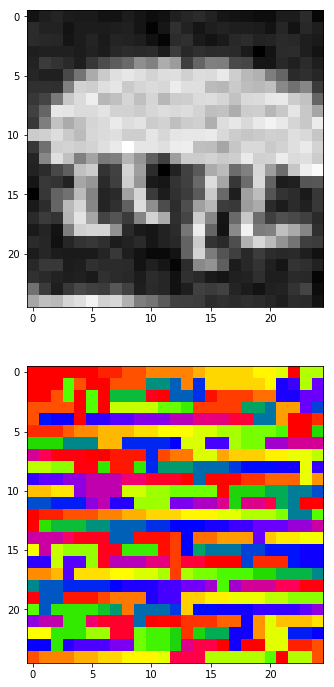

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio
import warnings
from math import inf
warnings.filterwarnings('ignore')

img = imageio.imread('./images/segments.png', pilmode='L')
img = img[:25, :25]

def homogeneity(a, b):
    if a >= img.size or b >= img.size:
        print("shit")
        return inf
    a_min, a_max = regions_range[a]
    b_min, b_max = regions_range[b]
    return max(a_max, b_max) - min(a_min, b_min)

label = np.arange(img.size, dtype=int)
regions = {} # region number: [pixel1, pixel2,...]
regions_range = {i: (img.item(i),) * 2 for i in range(img.size)} # region number: (min, max)

# four-neighbourhood: up, right, down, left
N4 = [-img.shape[1], 1, img.shape[1], -1]

# set homo for every pixel for each neighbor
N4_forward = [1, img.shape[1]]
homo = {(i, i + d): homogeneity(i, i + d) for i in range(img.size) for d in N4_forward if i + d < img.size}


threshold = 10
for _ in range(10000):
    # take two most similar regions
    a, b = min(homo, key=homo.__getitem__)
    cur_homo = homo.pop((a,b))
    if cur_homo > threshold:
        break
    print(f"Merging: {a}, {b}, true b: {label.item(b)}, {cur_homo}")
    # update b's region number, as destination region numbers are not updated
    # a = label.item(a)
    b = label.item(b)
    if a == b:
        print("same")
        continue
    # merge those regions:
    for i in regions.get(b, {b}):
        # set label to same value
        label[i] = a
        # delete homo entries starting at b
        for d in N4:
            p = i
            n = i + d
            if p > n:
                p, n = n, p
            homo.pop((p, n), None)
    # add pixels to region dict
    regions[a] = regions.get(a, {a}) | regions.pop(b, {b})
    # for faster access
    reg = regions[a]
    # update min and max value of region
    regions_range[a] = (img.flat[list(reg)].min().item(), img.flat[list(reg)].max().item())
    del regions_range[b]
    # calculate new homo for pixels in region
    for i in reg:
        for d in N4:
            # save current region in new variable to be able to swap if necessary
            p = a
            # neighbor region
            n = i + d
            # check if neighbor can exist
            if n >= img.size:
                continue
            # get region name
            n = label.item(n)
            if p == n:
                continue
            if p > n:
                p, n = n, p
            homo[(p, n)] = homogeneity(p, n)

label = label.reshape(img.shape)


plt.figure(figsize=(12, 12))
plt.gray()
plt.subplot(2,1,1)
plt.imshow(img)
plt.subplot(2,1,2)
plt.imshow(label, cmap='prism')
plt.show()


warnings.filterwarnings('ignore')